# Video Face Manipulation Detection Through Ensemble of CNNs
Image and Sound Processing Lab - Politecnico di Milano
- Nicolò Bonettini
- Edoardo Daniele Cannas
- Sara Mandelli
- Luca Bondi
- Paolo Bestagini

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.mkdir('/content/results')

In [ ]:
import zipfile


with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetAutoAttB4ST_1000_imgs/results_1000_imgs_EfficientNetAutoAttB4ST.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')


'''

with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetAutoAttB4ST_1000_imgs/results_1000_imgs_EfficientNetAutoAttB4ST.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')

with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetAutoAttB4_1000_imgs/results_1000_imgs_EfficientNetAutoAttB4.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')

with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetB4ST_1000_imgs/results_1000_imgs_EfficientNetB4ST.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')

with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetB4_1000_imgs/results_1000_imgs_EfficientNetB4.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')


with zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/Xception_1000_imgs/results_1000_imgs.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/results')
'''



"\n\nwith zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetAutoAttB4ST_1000_imgs/results_1000_imgs_EfficientNetAutoAttB4ST.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/results')\n\nwith zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetAutoAttB4_1000_imgs/results_1000_imgs_EfficientNetAutoAttB4.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/results')\n\nwith zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetB4ST_1000_imgs/results_1000_imgs_EfficientNetB4ST.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/results')\n\nwith zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/EfficientNetB4_1000_imgs/results_1000_imgs_EfficientNetB4.zip', 'r') as zip_ref:\n    zip_ref.extractall('/content/results')\n\n\nwith zipfile.ZipFile('/content/drive/MyDrive/DEEP_FAKE_DETECTION_2023/TEST_DFDC_part41/Xception_1

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import sklearn.metrics as M
from scipy.special import expit
from tqdm.notebook import tqdm

In [ ]:
results_root = Path('/content/results/')
results_model_folder = list(results_root.glob('net-*'))

In [ ]:
def compute_metrics(df_res:pd.DataFrame,train_tag:str) -> dict:
    numreal = sum(df_res['label']==False)
    numfake = sum(df_res['label']==True
)

    netname = train_tag.split('net-')[1].split('_')[0]
    traindb = train_tag.split('traindb-')[1].split('_')[0]

    loss = M.log_loss(df_res['label'],expit(df_res['score']))
    acc = M.accuracy_score(df_res['label'],df_res['score']>0)
    accbal = M.balanced_accuracy_score(df_res['label'],df_res['score']>0)
    rocauc = M.roc_auc_score(df_res['label'],df_res['score'])

    res_dict = {'traintag':train_tag,
                'net':netname,
                'traindb': traindb,
                'testdb':testdb,'testsplit':testsplit,
                'numreal':numreal,'numfake':numfake,
                'loss':loss,
                'acc':acc,'accbal':accbal,
                'rocauc':rocauc}
    return res_dict

In [ ]:
results_frame_list = []
results_video_list = []

for model_folder in tqdm(results_model_folder):
    train_model_tag = model_folder.name
    model_results = model_folder.glob('*.pkl')
    for model_path in model_results:
        testdb,testsplit = model_path.with_suffix('').name.rsplit('_',1)

        df_frames = pd.read_pickle(model_path)
        results_frame_list.append(compute_metrics(df_frames,train_model_tag))

        df_videos = df_frames[['video','label','score']].groupby('video').mean()
        df_videos['label'] = df_videos['label'].astype(np.bool)
        results_video_list.append(compute_metrics(df_videos,train_model_tag))

  0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-7-d8ec5fd7ee67>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_videos['label'] = df_videos['label'].astype(np.bool)


In [ ]:
df_res_frames = pd.DataFrame(results_frame_list)
df_res_frames

,traintag,net,traindb,testdb,testsplit,numreal,numfake,loss,acc,accbal,rocauc
0,net-EfficientNetAutoAttB4ST_traindb-dfdc-35-5-...,EfficientNetAutoAttB4ST,dfdc-35-5-10,dfdc-35-5-10,test,12927,31995,0.768982,0.644027,0.713358,0.813688


In [ ]:
df_res_video = pd.DataFrame(results_video_list)
df_res_video

,traintag,net,traindb,testdb,testsplit,numreal,numfake,loss,acc,accbal,rocauc
0,net-EfficientNetAutoAttB4ST_traindb-dfdc-35-5-...,EfficientNetAutoAttB4ST,dfdc-35-5-10,dfdc-35-5-10,test,404,1000,0.621989,0.68661,0.762297,0.890906


In [ ]:
df_res_frames.to_csv(results_root.joinpath('frames.csv'),index=False)
df_res_video.to_csv(results_root.joinpath('videos.csv'),index=False)


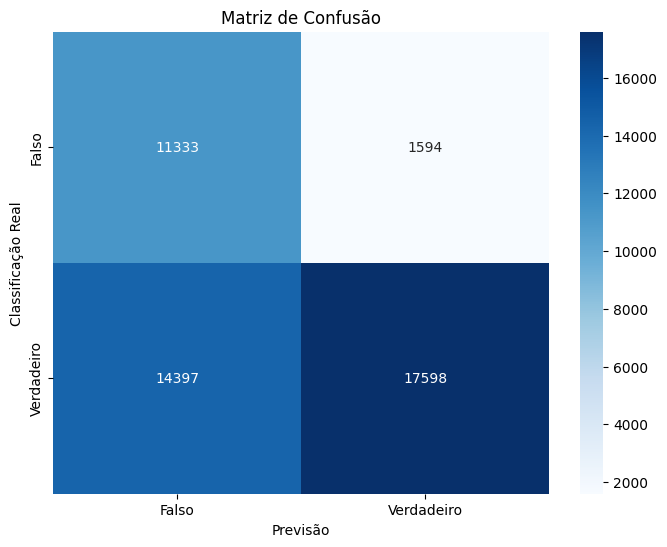

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo as previsões e rótulos verdadeiros para as frames
predicted_labels = df_frames['score'] > 0
true_labels = df_frames['label']

# Calculando a matriz de confusão
confusion = confusion_matrix(true_labels, predicted_labels)

# Exibindo a matriz de confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Falso', 'Verdadeiro'], yticklabels=['Falso', 'Verdadeiro'])
plt.xlabel('Previsão')
plt.ylabel('Classificação Real')
plt.title('Matriz de Confusão')
# Salvar a imagem do pairplot
plt.savefig('EfficientNetAutoAttB4ST_matriz_confusao.png')
plt.show()


In [ ]:
lista = []
import os

for image in os.listdir('pasta'):
  result = ...
  if result == True:
    lista.append('Acordado')


print(lista)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Suponha que você já tenha a matriz de confusão (confusion) definida

# Obtendo os valores da matriz de confusão
TN, FP, FN, TP = confusion.ravel()

# Calculando as métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Imprimindo as métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Accuracy: 0.6440
Precision: 0.9169
Recall (Sensitivity): 0.5500
Specificity: 0.8767
F1 Score: 0.6876
AUC-ROC: 0.7134


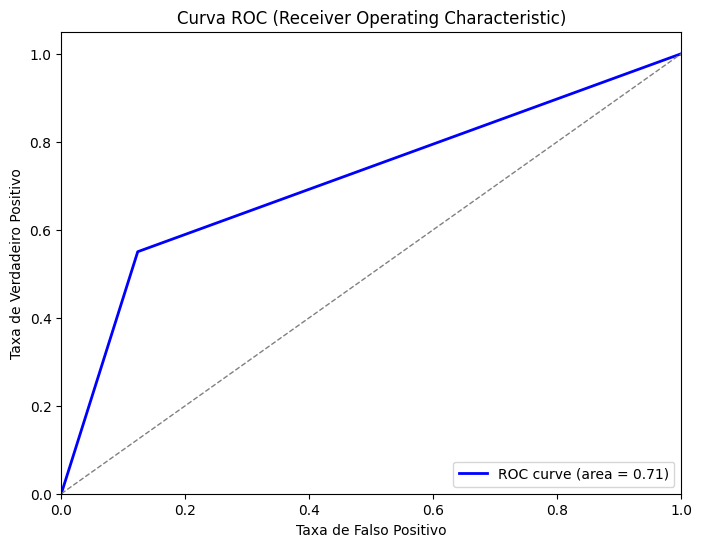

Accuracy: 0.6440
Precision: 0.9169
Recall (Sensitivity): 0.5500
Specificity: 0.8767
F1 Score: 0.6876
AUC-ROC: 0.7134


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Suponha que você já tenha a matriz de confusão (confusion) definida
# Suponha também que você tenha as true_labels e predicted_labels

# Obtendo os valores da matriz de confusão
TN, FP, FN, TP = confusion.ravel()

# Calculando as métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.savefig('EfficientNetAutoAttB4ST_ROC.png')
plt.show()

# Imprimindo as métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
